##### Import Packages

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import os
from email.utils import parseaddr
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Dense
from keras.layers.core import Activation
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import concatenate
from string import digits
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras import backend as K
import datetime
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as layer

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download globe model tokens https://nlp.stanford.edu/projects/glove/
!curl --header "Host: downloads.cs.stanford.edu" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://nlp.stanford.edu/" --header "Cookie: _ga=GA1.2.545929601.1671976005; _gid=GA1.2.2065625101.1671976005; _gat=1" --header "Connection: keep-alive" "https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -L -o "glove.6B.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  822M  100  822M    0     0  4485k      0  0:03:07  0:03:07 --:--:-- 3423k


In [ ]:
!unzip "/content/glove.6B.zip" -d "/content/glove"

Archive:  /content/glove.6B.zip
  inflating: /content/glove/glove.6B.50d.txt  
  inflating: /content/glove/glove.6B.100d.txt  
  inflating: /content/glove/glove.6B.200d.txt  
  inflating: /content/glove/glove.6B.300d.txt  


In [ ]:
text_df = pd.read_csv("/content/drive/MyDrive/Mitesh/email_data_preprocess.csv")
text_df

,text,email_id,subject,raw_text,class_label
0,his was posted the firearms politics mailing l...,hound dazixca ingr hound dazixca ingr,randy weaver trail - day 3,From: crphilli@hound.dazixca.ingr.com (Ron Phi...,talk.politics.guns
1,having problem with truetype fonts windows hav...,gandalf fl bs dlr de gandalf fl bs dlr de,truetype font mix-up times=>cyrillic,From: FL2G@gandalf.fl.bs.dlr.de (Reiner Suikat...,comp.os.ms-windows.misc
2,does the radio electronics free information ca...,panix acsu buffalo edu ubvmsb cc buffalo ed...,radio electronics free information card,From: schuster@panix.com (Michael Schuster) Su...,sci.electronics
3,uppose have boolean function which minimal sum...,carson u washington edu ringer cs utsa edu r...,minimal boolean circuit,From: whit@carson.u.washington.edu (John Whitm...,sci.electronics
4,ello name john and have the following comic bo...,iscsvax uni edu iscsvax uni edu iscsvax uni edu,****comic book sale****,From: oeth6050@iscsvax.uni.edu Subject: ****CO...,misc.forsale
...,...,...,...,...,...
18823,ate begets more hate never love consider some ...,world std athos rutgers edu prism gatech edu,hate the sin...,From: pduggan@world.std.com (Paul C Duggan) Su...,soc.religion.christian
18824,article arromdee jyusenkyou jhu edu think many...,newton apple blaze cs jhu edu jyusenkyou cs...,yet more rushdie [ islamic law],From: sandvik@newton.apple.com (Kent Sandvik) ...,alt.atheism
18825,ould some one tell what har lap err the chip c...,spartan ac brocku ca nmt edu jupiter nmt edu...,help! phar lap???,From: tmc@spartan.ac.BrockU.CA (Tim Ciceran) S...,comp.sys.ibm.pc.hardware
18826,abital planets are also dependent what kind pl...,ucsu colorado edu aurora alaska edu aurora a...,human habitale planets?,From: fcrary@ucsu.Colorado.EDU (Frank Crary) S...,sci.space


In [ ]:
text_df['subject'].replace({'[^A-Za-z_]' : ' '}, regex=True, inplace=True)    # remove special char from text

In [ ]:
text_df['combine'] = text_df['text'] + text_df[ 'subject'] + text_df['email_id']   # combine text, subject and email id

In [ ]:
text_df

,text,email_id,subject,raw_text,class_label,combine
0,his was posted the firearms politics mailing l...,hound dazixca ingr hound dazixca ingr,randy weaver trail day,From: crphilli@hound.dazixca.ingr.com (Ron Phi...,talk.politics.guns,his was posted the firearms politics mailing l...
1,having problem with truetype fonts windows hav...,gandalf fl bs dlr de gandalf fl bs dlr de,truetype font mix up times cyrillic,From: FL2G@gandalf.fl.bs.dlr.de (Reiner Suikat...,comp.os.ms-windows.misc,having problem with truetype fonts windows hav...
2,does the radio electronics free information ca...,panix acsu buffalo edu ubvmsb cc buffalo ed...,radio electronics free information card,From: schuster@panix.com (Michael Schuster) Su...,sci.electronics,does the radio electronics free information ca...
3,uppose have boolean function which minimal sum...,carson u washington edu ringer cs utsa edu r...,minimal boolean circuit,From: whit@carson.u.washington.edu (John Whitm...,sci.electronics,uppose have boolean function which minimal sum...
4,ello name john and have the following comic bo...,iscsvax uni edu iscsvax uni edu iscsvax uni edu,comic book sale,From: oeth6050@iscsvax.uni.edu Subject: ****CO...,misc.forsale,ello name john and have the following comic bo...
...,...,...,...,...,...,...
18823,ate begets more hate never love consider some ...,world std athos rutgers edu prism gatech edu,hate the sin,From: pduggan@world.std.com (Paul C Duggan) Su...,soc.religion.christian,ate begets more hate never love consider some ...
18824,article arromdee jyusenkyou jhu edu think many...,newton apple blaze cs jhu edu jyusenkyou cs...,yet more rushdie islamic law,From: sandvik@newton.apple.com (Kent Sandvik) ...,alt.atheism,article arromdee jyusenkyou jhu edu think many...
18825,ould some one tell what har lap err the chip c...,spartan ac brocku ca nmt edu jupiter nmt edu...,help phar lap,From: tmc@spartan.ac.BrockU.CA (Tim Ciceran) S...,comp.sys.ibm.pc.hardware,ould some one tell what har lap err the chip c...
18826,abital planets are also dependent what kind pl...,ucsu colorado edu aurora alaska edu aurora a...,human habitale planets,From: fcrary@ucsu.Colorado.EDU (Frank Crary) S...,sci.space,abital planets are also dependent what kind pl...


In [ ]:
# check nan values in dataset
text_df.dropna(inplace=True)

In [ ]:
text_df.shape

(18789, 6)

In [ ]:
# text_df.to_csv("/content/drive/MyDrive/email_data_preprocess2.csv", index=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_df['combine'], text_df['class_label'], test_size = 0.25, stratify = text_df['class_label'])

print(x_train.values.reshape(-1,1).shape, y_train.shape)
print(x_test.values.reshape(-1,1).shape, y_test.shape)

(14091, 1) (14091,)
(4698, 1) (4698,)


In [ ]:
max_len = 30000

tokeniser = tf.keras.preprocessing.text.Tokenizer(num_words= 30000, filters='!"#$%&()*+,-./:;//~<=>?@[\\]^`{|}~\t\n', lower=True, split=" ", char_level=False, oov_token=None)

# convert text into tokens
tokeniser_text_train = tokeniser.fit_on_texts(x_train)
print('Length of the tokeniser : ', len(tokeniser.word_index))

# convert text into seq
sequence_train = tokeniser.texts_to_sequences(x_train)
sequence_test = tokeniser.texts_to_sequences(x_test)
print('Squence Length : ',len(sequence_train))

padding_train = tf.keras.preprocessing.sequence.pad_sequences(sequence_train, maxlen = max_len, padding='post')
padding_test = tf.keras.preprocessing.sequence.pad_sequences(sequence_test, maxlen = max_len, padding='post')

print('padding : ', len(padding_test[0]))
padding_train.shape, padding_test.shape


Length of the tokeniser :  135503
Squence Length :  14091
padding :  30000


((14091, 30000), (4698, 30000))

In [ ]:
#https://stackoverflow.com/questions/49995700/multi-label-text-classification-i-have-a-text-labelcsv-text-is-pure-text-lab

train_labels = y_train
test_labels = y_test

le = LabelEncoder()
le.fit(train_labels.tolist() + test_labels.tolist())
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

labels_train = to_categorical(np.asanyarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))

print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([599, 727, 735, 734, 717, 733, 722, 740, 745, 745, 748, 743, 736,
       741, 739, 748, 682, 705, 581, 471]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([199, 243, 245, 245, 239, 245, 240, 247, 248, 248, 250, 248, 245,
       247, 247, 249, 227, 235, 194, 157]))
Shape of label tensor: (14091, 20)
Shape of label tensor: (4698, 20)


In [ ]:
########## Create emebdding matrix ###########

embeddings_index = {}
f = open(os.path.join('/content/glove/glove.6B.300d.txt'))
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))

0it [00:00, ?it/s]

Found 400000 word vectors.


In [ ]:
word_index = tokeniser.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

  0%|          | 0/135503 [00:00<?, ?it/s]

In [ ]:
########### create emebdding layer ############

embedding_layer = Embedding(len(word_index) + 1, 
                            300,
                            weights=[embedding_matrix],
                            input_length= max_len,
                            trainable=False)

In [ ]:
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
sequence_input = Input(shape=(max_len,))

#embedding
embedding = embedding_layer(sequence_input)

# 3 CNN layer
cnn1 = tf.keras.layers.Conv1D(filters = 25, kernel_size = 3, strides=1, padding= "same", 
                              data_format="channels_last", activation = 'relu',
                              kernel_regularizer= regularizers.l2(0.01))(embedding)

cnn2 = tf.keras.layers.Conv1D(filters = 35, kernel_size = 3, strides=1, padding= "same",
                              data_format="channels_last",activation = 'relu',
                              kernel_regularizer= regularizers.l2(0.01))(embedding)

cnn3 = tf.keras.layers.Conv1D(filters = 39, kernel_size = 5, strides=1, padding="same", 
                              data_format="channels_last",activation = 'relu',
                              kernel_regularizer= regularizers.l2(0.01))(embedding)

#Concate the 3 CNN layer andmaxpool layer
cnn1_concate = concatenate([cnn1,cnn2, cnn3])
max_pool1 = tf.keras.layers.MaxPooling1D(pool_size=10, strides=1, padding="same", 
                                         data_format="channels_last")(cnn1_concate)


# 3 CNN layer
cnn4 = tf.keras.layers.Conv1D(filters = 6, kernel_size = 3, strides=1, padding="same", data_format="channels_last",
                              activation = 'relu',kernel_regularizer= regularizers.l2(0.01))(max_pool1)

cnn5 = tf.keras.layers.Conv1D(filters = 4, kernel_size = 3, strides=1, padding="same", data_format="channels_last",
                              activation = 'relu',kernel_regularizer= regularizers.l2(0.01))(max_pool1)

cnn6 = tf.keras.layers.Conv1D(filters = 8, kernel_size = 5, strides=1, padding="same", data_format="channels_last",
                              activation = 'relu',kernel_regularizer= regularizers.l2(0.01))(max_pool1)


#Concate the 3 CNN layer and maxpool layer
cnn2_concate = concatenate([cnn4,cnn5, cnn6])
max_pool2 = tf.keras.layers.MaxPooling1D(pool_size=15, strides=1, padding="same", 
                                         data_format="channels_last")(cnn2_concate)

# 1 CNN layer
cnn7 = tf.keras.layers.Conv1D(filters = 12, kernel_size = 5, strides=1, padding="same", data_format="channels_last",
                              activation = 'relu', kernel_regularizer= regularizers.l2(0.01))(max_pool2)

#Flatten layer
flatten1 = tf.keras.layers.Flatten()(cnn7)
# 2 Dropout layer
dp1 = tf.keras.layers.Dropout(0.3, seed = 10)(flatten1)
dp2 = tf.keras.layers.Dropout(0.2, seed = 10)(dp1)

dense1 = tf.keras.layers.Dense(64, activation= 'relu')(dp2)
dense2 = tf.keras.layers.Dense(32, activation= 'relu')(dense1)

#Outpur layer
output = tf.keras.layers.Dense(20, activation = 'softmax')(dense2)
model = tf.keras.Model(inputs=[sequence_input], outputs=[output])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 30000)]      0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 30000, 300)   40651200    ['input_8[0][0]']                
                                                                                                  
 conv1d_42 (Conv1D)             (None, 30000, 25)    22525       ['embedding_3[1][0]']            
                                                                                                  
 conv1d_43 (Conv1D)             (None, 30000, 35)    31535       ['embedding_3[1][0]']            
                                                                                            

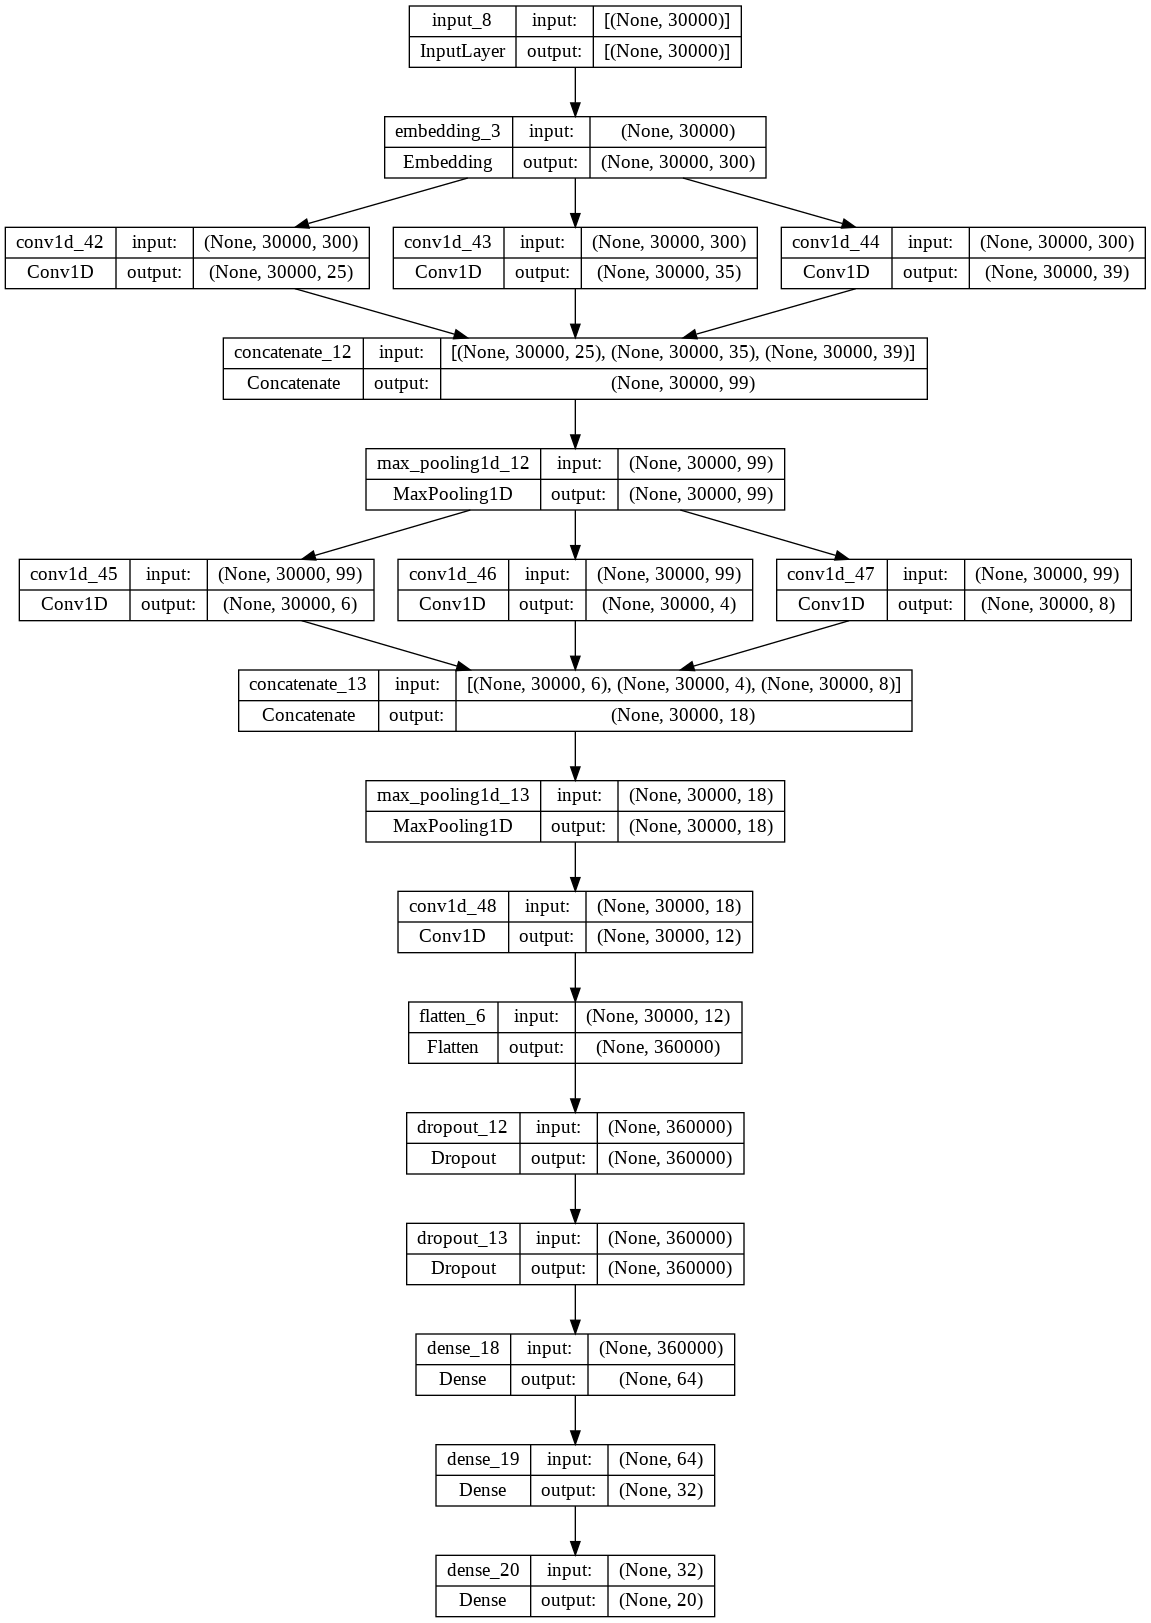

In [ ]:
tf.keras.utils.plot_model(model, to_file='model1 -text classification .png', 
                          show_shapes= True,show_layer_names=True,rankdir='TB', 
                          expand_nested=False, dpi=96)


In [ ]:
!rm -rf ./logs1/
os.chdir("/content")
!mkdir 'logs1'
log_dir = "/content/logs1/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
tensor = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq=1, write_graph = True, write_images = True, update_freq = 1)

In [ ]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=4, 
                                                      verbose=0, mode='max', baseline=None, restore_best_weights=False)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy', f1])


In [ ]:
history = model.fit(padding_train, labels_train, 
          epochs = 30, verbose=1, 
          validation_data = (padding_test, labels_test), 
          callbacks = [tensor, earlystop_callback])

Epoch 1/30
441/441 [==============================] - 41s 88ms/step - loss: 2.5730 - accuracy: 0.2534 - f1: 0.1381 - val_loss: 1.8443 - val_accuracy: 0.4442 - val_f1: 0.2988
Epoch 2/30
441/441 [==============================] - 38s 86ms/step - loss: 1.5304 - accuracy: 0.5589 - f1: 0.5121 - val_loss: 1.4618 - val_accuracy: 0.6088 - val_f1: 0.5282
Epoch 3/30
441/441 [==============================] - 38s 86ms/step - loss: 1.3081 - accuracy: 0.6459 - f1: 0.6097 - val_loss: 1.3933 - val_accuracy: 0.6484 - val_f1: 0.5604
Epoch 4/30
441/441 [==============================] - 38s 87ms/step - loss: 1.1826 - accuracy: 0.6985 - f1: 0.6767 - val_loss: 1.3118 - val_accuracy: 0.6897 - val_f1: 0.6455
Epoch 5/30
441/441 [==============================] - 38s 87ms/step - loss: 1.0861 - accuracy: 0.7373 - f1: 0.7278 - val_loss: 1.3058 - val_accuracy: 0.6977 - val_f1: 0.6543
Epoch 6/30
441/441 [==============================] - 38s 87ms/step - loss: 1.0229 - accuracy: 0.7716 - f1: 0.7648 - val_loss: 1.3

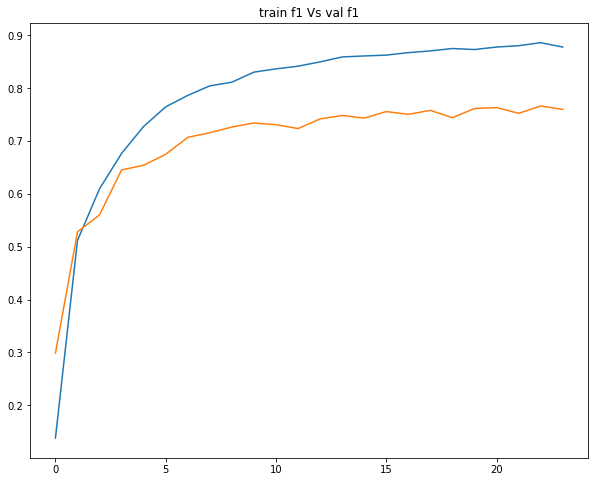

In [ ]:
f1_train = history.history['f1']
f1_val   = history.history['val_f1']

plt.figure(figsize=(10,8))
plt.plot(list(range(24)), f1_train, label='train_f1')
plt.plot(list(range(24)), f1_val, label='val_f1')
plt.title("train f1 Vs val f1")
plt.show()

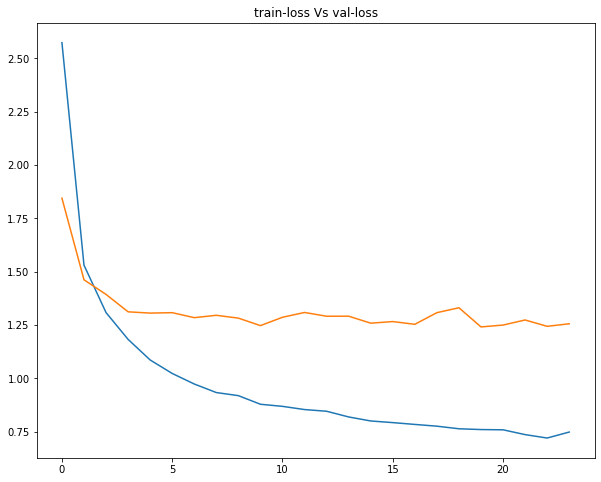

In [ ]:
loss_train = history.history['loss']
loss_val   = history.history['val_loss']

plt.figure(figsize=(10,8))
plt.plot(list(range(24)), loss_train, label='train_loss')
plt.plot(list(range(24)), loss_val, label='val_loss')
plt.title("train-loss Vs val-loss")
plt.show()